# **0. Import Dependencies and Pretrained Model**

In [12]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [13]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
print("Model loaded successfully!")

Model loaded successfully!


# **1. Preprocess Image and Load**

In [15]:
def load_image(img_path, target_size=(512, 512)):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, target_size)
    img = img[tf.newaxis, :]  # add batch dimension
    return img

In [16]:
content_image = load_image('Testing3.png')
style_image = load_image('Testing4.jpg')

# **2. Visualize Output** 

(-0.5, 511.5, 511.5, -0.5)

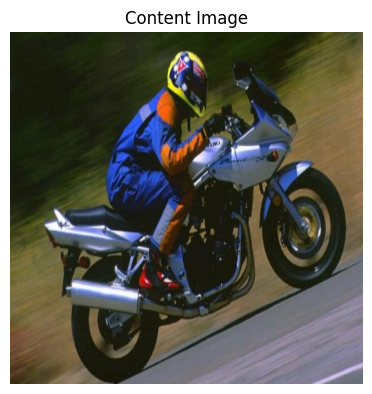

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(tf.squeeze(content_image))
plt.title("Content Image")
plt.axis('off')


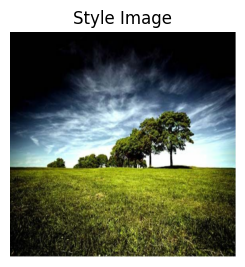

In [19]:
plt.subplot(1,2,2)
plt.imshow(tf.squeeze(style_image))
plt.title("Style Image")
plt.axis('off')
plt.show()


# **3. Stylize Image**

In [21]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

In [22]:
output_image = tf.squeeze(stylized_image).numpy()
output_image = np.clip(output_image * 255, 0, 255).astype(np.uint8)

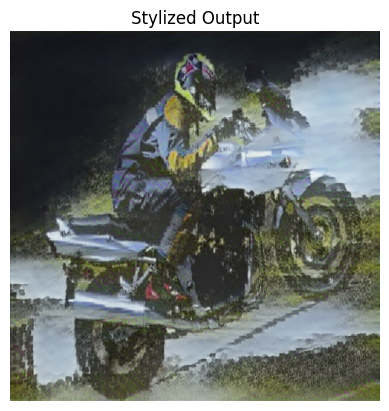

In [23]:
plt.imshow(output_image)
plt.title("Stylized Output")
plt.axis('off')
plt.show()

# **4. Export the Generated Neural Style Image**

In [25]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR))
print("Generated image saved as 'generated_img.jpg'")

Generated image saved as 'generated_img.jpg'
